In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

def graph_to_adj_matrix(graph):
    A = nx.to_numpy_matrix(graph)
    A = A.astype(np.int64)
    return A

def adj_matrix_to_list(adj_mat):
    ''' Convert an adjacency matrix (numpy 2d array) to list of important values '''
    n = adj_mat.shape[0] - 1
    adj_list = []
    
    for i in range(n):
        adj_list += adj_mat[i,i+1:].A1.tolist()
    
    return adj_list, n

def adj_list_to_matrix(adj_list, n):
    li_of_li = []
    A = np.zeros((n+1, n+1), int)
    
    i = 0
    j = n
    m = 0
    
    while m < n:
        A[m,m+1:] = adj_list[i:j]
        i = j
        j = i + n - (m + 1)
        m += 1
    
    A = A + A.T
    
    return A

### Generate a new graph and plot

In [2]:
G = nx.gnm_random_graph(10, 20)
pos = nx.spring_layout(G)

/home/shlapo/.anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/home/shlapo/.anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/home/shlapo/.anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/home/shlapo/.anaconda3/lib/python3.6/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.ho

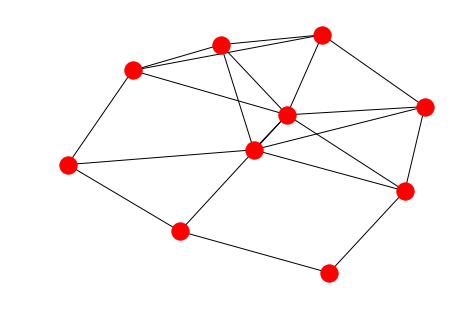

In [3]:
nx.draw(G, pos=pos)
plt.show()

### Convert graph adjacency matrix to list and back again, and plot in same layout

In [4]:
A = graph_to_adj_matrix(G)
a_list, n = adj_matrix_to_list(A)

In [5]:
B = adj_list_to_matrix(a_list, n)
H = nx.convert_matrix.from_numpy_matrix(B)

/home/shlapo/.anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/home/shlapo/.anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/home/shlapo/.anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/home/shlapo/.anaconda3/lib/python3.6/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.ho

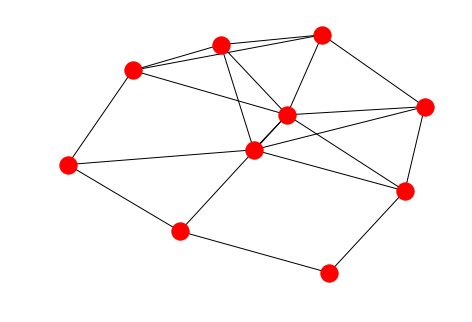

In [6]:
nx.draw(H, pos=pos)
plt.show()

### Create new graph with randomly modified edges

In [7]:
from random import sample
# Function to create new graph with randomly modified edges
def mutate_graph(G, n_mut):
    A = nx.to_numpy_matrix(G)
    A = A.astype(np.int64)
    a_list, n = adj_matrix_to_list(A)
    
    rs = sample(range(len(a_list)), n_mut)
    for r in rs:
        a_list[r] ^= 1
    
    B = adj_list_to_matrix(a_list, n)
    H = nx.convert_matrix.from_numpy_matrix(B)
    
    return H
# Convert to list, randomly select list value and change it, convert to matrix

/home/shlapo/.anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/home/shlapo/.anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/home/shlapo/.anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/home/shlapo/.anaconda3/lib/python3.6/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.ho

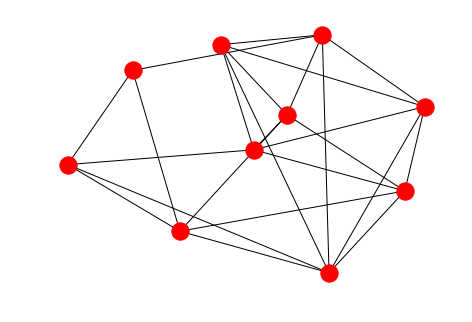

In [8]:
H = mutate_graph(G, 10)
nx.draw(H, pos=pos)
plt.show()

### Calculate cost of new graph

In [9]:
def new_cost(H):
    S = np.bitwise_xor(graph_to_adj_matrix(G), graph_to_adj_matrix(H))
    cost = S.sum()/2
    
    return cost

### Calculate Resilience

/home/shlapo/.anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/home/shlapo/.anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/home/shlapo/.anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/home/shlapo/.anaconda3/lib/python3.6/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.ho

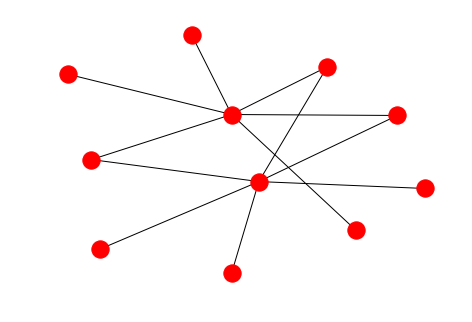

In [23]:
test_adj_list = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0]
test_adj_mat = adj_list_to_matrix(test_adj_list, 10)
T = nx.convert_matrix.from_numpy_matrix(test_adj_mat)

# T = nx.gnm_random_graph(10, 20)
t_pos = nx.spring_layout(T)

nx.draw(T, pos=t_pos)
plt.show()

In [26]:
# c_e = list(nx.eigenvector_centrality(T).values())
c_d = list(nx.degree_centrality(T).values())
c_b = list(nx.betweenness_centrality(T).values())
c_c = list(nx.closeness_centrality(T).values())
c_ratio = [c_e[i]/c_d[i] for i in range(len(c_e))]

print(c_d)
print(c_b)
print(c_c)

# nx.draw(P, pos=t_pos, node_color=c_e, cmap=plt.cm.Blues)
plt.show()

[0.1, 0.1, 0.1, 0.6000000000000001, 0.2, 0.2, 0.2, 0.6000000000000001, 0.1, 0.1, 0.1]
[0.0, 0.0, 0.0, 0.5666666666666667, 0.11851851851851852, 0.11851851851851852, 0.11851851851851852, 0.5666666666666667, 0.0, 0.0, 0.0]
[0.38461538461538464, 0.38461538461538464, 0.38461538461538464, 0.5882352941176471, 0.5555555555555556, 0.5555555555555556, 0.5555555555555556, 0.5882352941176471, 0.38461538461538464, 0.38461538461538464, 0.38461538461538464]


### Import Puerto Rico Power Grid Network

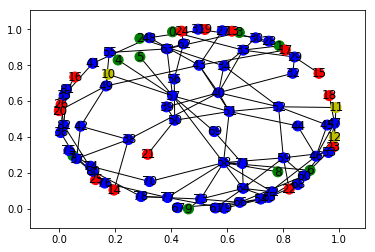

In [10]:
# generation_plants = {'Costa Sur':, 'EcoElectrica', 'Aguirre 1', 'Aguirre 2', 'Cambalache', 'Palo Seco Plant', 'San Juan 1 Plant', 'San Juan 2 Plant', 'Guayama Plant', 'Mayaguez Plant'}

pr_adj = np.genfromtxt('data/pr_power_grid.csv', delimiter=',')
P = nx.convert_matrix.from_numpy_matrix(pr_adj)

pr_pos = nx.spring_layout(P)
pr_colors = ['g']*10 + ['y']*3 + ['r']*14 + ['b']*56


nx.draw_networkx(P, pos=pr_pos, node_size=100, node_color=pr_colors)
plt.show()


/home/shlapo/.anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/home/shlapo/.anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/home/shlapo/.anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/home/shlapo/.anaconda3/lib/python3.6/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.ho

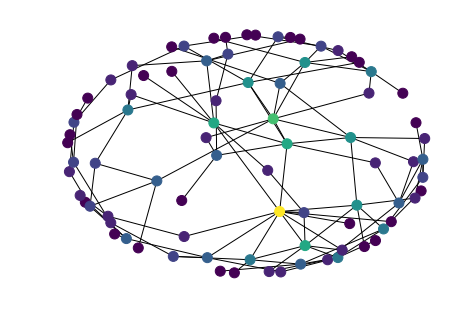

In [16]:
from scipy.linalg import eig

c_e = list(nx.eigenvector_centrality(P).values())
c_d = list(nx.degree_centrality(P).values())
c_b = list(nx.betweenness_centrality(P).values())
c_c = list(nx.closeness_centrality(P).values())

c_ratio = [c_e[i]/c_d[i] for i in range(len(c_e))]

nx.draw(P, pos=pr_pos, node_size=100, node_color=c_d, cmap=plt.cm.viridis)
plt.show()

/home/shlapo/.anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/home/shlapo/.anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/home/shlapo/.anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/home/shlapo/.anaconda3/lib/python3.6/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.ho

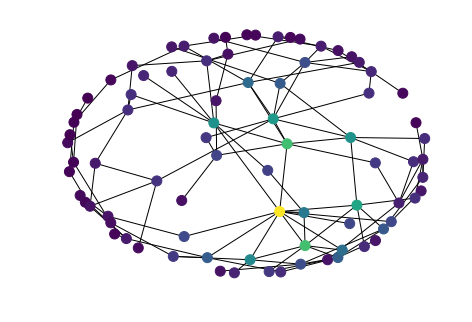

In [17]:
nx.draw(P, pos=pr_pos, node_size=100, node_color=c_e, cmap=plt.cm.viridis)
plt.show()

/home/shlapo/.anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/home/shlapo/.anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/home/shlapo/.anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/home/shlapo/.anaconda3/lib/python3.6/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.ho

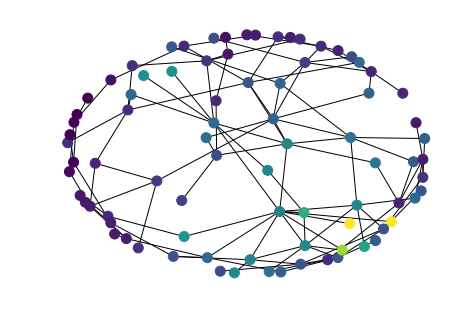

In [18]:
nx.draw(P, pos=pr_pos, node_size=100, node_color=c_ratio, cmap=plt.cm.viridis)
plt.show()

/home/shlapo/.anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/home/shlapo/.anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/home/shlapo/.anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/home/shlapo/.anaconda3/lib/python3.6/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.ho

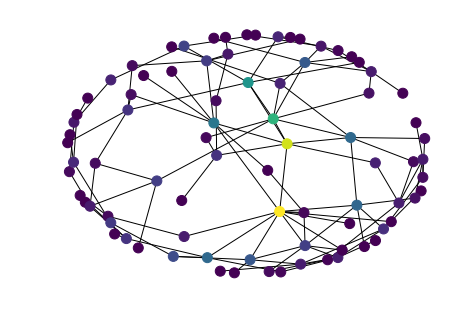

In [19]:
nx.draw(P, pos=pr_pos, node_size=100, node_color=c_b, cmap=plt.cm.viridis)
plt.show()

/home/shlapo/.anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/home/shlapo/.anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/home/shlapo/.anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/home/shlapo/.anaconda3/lib/python3.6/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.ho

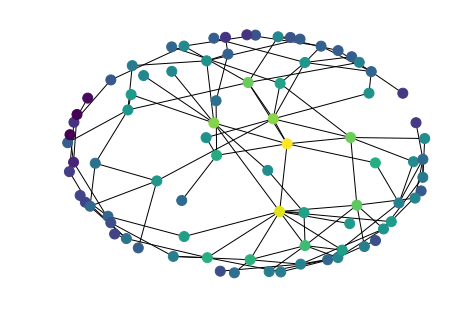

In [20]:
nx.draw(P, pos=pr_pos, node_size=100, node_color=c_c, cmap=plt.cm.viridis)
plt.show()

# Import and Initialize GA

In [ ]:
from General_Genetic_Search import GeneticSearch, GeneticAgent

In [ ]:
params = {}

Gsearch = GeneticSearch()

G = nx.graph(PuertoRico)
Gsearch.agents